# Tugas Tim Klasifikasi Text

| NIM | Nama |
| --- | ---- |
| 13519019 | Jason Stanley Yoman |
| 13519025 | Wilbert Fangderson |
| 13519118 | Cynthia Rusadi |
| 13519191 | Kevin Ryan |

### Preprocessing

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Data Preprocessing

In [18]:
df.head()

,Unnamed: 0,text_a,label
0,0,betewe buka twitter cuman ngetweet liat home b...,no
1,1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no
2,2,e100ss gini buka informasi sejelas nya identit...,yes
3,3,neng solo wes ono terduga corona cobo neng ati...,no
4,4,midiahn nii akun gak takut takut nya isu coron...,no


#### Handling Missing Values
Pertama-tama akan dilihat terlebih dahulu apakah ada null/missing values pada dataset

In [14]:
df.isnull().sum()

Unnamed: 0    0
text_a        0
label         0
dtype: int64

Dari hasil di atas, terlihat bahwa tidak ada null values, sehingga data tidak perlu dihandle untuk mengatasi missing values

#### Handling Duplicate Values

In [ ]:
df.shape

(21601, 3)

Selanjutnya, akan dibuang kolom Unnamed: 0 karena tidak isi kolom sama dengan indeks, sehingga tidak berpengaruh terhadap label. Setelah itu, akan didrop cells yang berulang/duplicate.

In [19]:
# Dropping Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis = 1)

# Drop duplicates
df = df.drop_duplicates("text_a")
df_test = df_test.drop_duplicates("text_a")

In [ ]:
df.shape

(16221, 2)

Terlihat dari df.shape bahwa jumlah rows sebelumnya adalah 21601, namun ketika didrop duplicates, yang terjadi adalah ukuran dataset berkurang menjadi 16221. Oleh karena itu, dapat disimpulkan bahwa terdapat 5380 baris duplicates. Baris yang berulang ini akan didrop/dibuang

#### Convert to lowercases, strip, and remove punctuations

Step selanjutnya adalah akan mengubah seluruh kata menjadi lowercase, lalu text akan dipisah, dan dibuang setiap kata yang mengandung punctuations.

In [20]:
import re
import string

def earlyProcess(text) :
  text = text.lower()
  text = text.strip()
  text = re.compile('<.*?>').sub('', text) 
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
  text = re.sub('\s+', ' ', text)  
  text = re.sub(r'\[[0-9]*\]',' ',text) 
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
  text = re.sub(r'\d',' ',text) 
  text = re.sub(r'\s+',' ',text)
  return text

df["early_processed"] = df['text_a'].apply(lambda x:earlyProcess(x))
df_test["early_processed"] = df_test['text_a'].apply(lambda x:earlyProcess(x))

#### Remove Stopwords
Setelah itu, akan dibuang seluruh stopwords dari setiap kata dalam dataframe. Stopwords akan dibuang dengan memanfaatkan library nltk

In [21]:
from google.colab import drive
!pip install nltk

import nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df["text_without_stopwords"] = df["early_processed"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test["text_without_stopwords"] = df_test["early_processed"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df

,text_a,label,early_processed,text_without_stopwords
0,betewe buka twitter cuman ngetweet liat home b...,no,betewe buka twitter cuman ngetweet liat home b...,betewe buka twitter cuman ngetweet liat home b...
1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no,mas piyuuu mugo corona tuh mulut tersumpal ma ...,mas piyuuu mugo corona tuh mulut tersumpal corona
2,e100ss gini buka informasi sejelas nya identit...,yes,e ss gini buka informasi sejelas nya identitas...,e ss gini buka informasi sejelas nya identitas...
3,neng solo wes ono terduga corona cobo neng ati...,no,neng solo wes ono terduga corona cobo neng ati...,neng solo wes ono terduga corona cobo neng ati...
4,midiahn nii akun gak takut takut nya isu coron...,no,midiahn nii akun gak takut takut nya isu coron...,midiahn nii akun gak takut takut nya isu coron...
...,...,...,...,...
17420,mengejutkan 2 cases covid 19 indonesia tenaga ...,yes,mengejutkan cases covid indonesia tenaga medis...,mengejutkan cases covid indonesia tenaga medis...
17422,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...
17424,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...
17426,giapratamamd kalo ga berinteraksi orang positi...,no,giapratamamd kalo ga berinteraksi orang positi...,giapratamamd kalo ga berinteraksi orang positi...


#### Lemmatization
Step selanjutnya adalah akan melakukan lematisasi dari setiap kata.

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

wl = WordNetLemmatizer()

# Fungsi mapping NLTK position tags
def get_wordnet_pos(tag) :
  if tag.startswith('J'):
      return wordnet.ADJ
  elif tag.startswith('V'):
      return wordnet.VERB
  elif tag.startswith('N'):
      return wordnet.NOUN
  elif tag.startswith('R'):
      return wordnet.ADV
  else:
      return wordnet.NOUN

def lemmatizer(string) :
  word_pos_tags = nltk.pos_tag(word_tokenize(string))
  a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
  return " ".join(a)

df["lemmatized"] = df["text_without_stopwords"].apply(lambda x: lemmatizer(x))
df_test["lemmatized"] = df_test["text_without_stopwords"].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Data akan didrop duplicates sekali lagi untuk mencegah adanya row yang sama akibat selesai preprocessing

In [24]:
df = df.drop_duplicates("lemmatized")
df_test = df_test.drop_duplicates("lemmatized")

In [9]:
df

,text_a,label,early_processed,text_without_stopwords,lemmatized
0,betewe buka twitter cuman ngetweet liat home b...,no,betewe buka twitter cuman ngetweet liat home b...,betewe buka twitter cuman ngetweet liat home b...,betewe buka twitter cuman ngetweet liat home b...
1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no,mas piyuuu mugo corona tuh mulut tersumpal ma ...,mas piyuuu mugo corona tuh mulut tersumpal corona,ma piyuuu mugo corona tuh mulut tersumpal corona
2,e100ss gini buka informasi sejelas nya identit...,yes,e ss gini buka informasi sejelas nya identitas...,e ss gini buka informasi sejelas nya identitas...,e s gini buka informasi sejelas nya identitas ...
3,neng solo wes ono terduga corona cobo neng ati...,no,neng solo wes ono terduga corona cobo neng ati...,neng solo wes ono terduga corona cobo neng ati...,neng solo wes ono terduga corona cobo neng ati...
4,midiahn nii akun gak takut takut nya isu coron...,no,midiahn nii akun gak takut takut nya isu coron...,midiahn nii akun gak takut takut nya isu coron...,midiahn nii akun gak takut takut nya isu coron...
...,...,...,...,...,...
17420,mengejutkan 2 cases covid 19 indonesia tenaga ...,yes,mengejutkan cases covid indonesia tenaga medis...,mengejutkan cases covid indonesia tenaga medis...,mengejutkan case covid indonesia tenaga medis ...
17422,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...
17424,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...
17426,giapratamamd kalo ga berinteraksi orang positi...,no,giapratamamd kalo ga berinteraksi orang positi...,giapratamamd kalo ga berinteraksi orang positi...,giapratamamd kalo ga berinteraksi orang positi...


#### Vectorization
Selanjutnya, akan dilakukan vektorisasi untuk text pada dataframe. Vectorizer yang akan digunakan adalah Tf-Idf

In [10]:
# Akan diambil kolom yang sudah dilakukan lematisasi
X_train = df["lemmatized"]
y_train = df["label"]

# Untuk test dataset
testDf = pd.read_csv("test.csv")
X_test = testDf["text_a"]
y_test = testDf["label"]

# Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf = True)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Data Processing
Maksud data processing disini adalah membuat model, melakukan fitting atau melatih model, dan kemudian memprediksi hasilnya.

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

def LRPredict(X_train, y_train, X_test):
    lr = LogisticRegression(solver = "liblinear")
    lr.fit(X_train, y_train)
    return lr.predict(X_test)

In [ ]:
y_pred_lr = LRPredict(X_train_tfidf, y_train, X_test_tfidf)

In [ ]:
y_pred_lr

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_lr, pos_label="yes"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_lr, pos_label="yes"):.2f}')

Accuracy: 0.85
Precision: 0.78
Recall: 0.57


#### XGBoost

In [ ]:
import xgboost

def XGBPredict(X_train, y_train, X_test):
    xgb = xgboost.XGBClassifier()
    xgb.fit(X_train, y_train)
    return xgb.predict(X_test)

In [ ]:
y_pred_xgb = XGBPredict(X_train_tfidf, y_train, X_test_tfidf)

In [ ]:
y_pred_xgb

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb, pos_label="yes"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_xgb, pos_label="yes"):.2f}')

Accuracy: 0.81
Precision: 0.77
Recall: 0.36


## Algoritma deep learning dengan non contextual word embedding (word2vec)

In [32]:
!pip install gensim
import nltk
import gensim
from gensim.models import Word2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Processing

In [27]:
# Tokenization
X_train_tok= [nltk.word_tokenize(i) for i in df["lemmatized"]]  
X_test_tok= [nltk.word_tokenize(i) for i in df_test["lemmatized"]]

In [28]:
df['tokenized']=[nltk.word_tokenize(i) for i in df['lemmatized']]
df_test['tokenized']=[nltk.word_tokenize(i) for i in df_test['lemmatized']]

In [ ]:
df

,text_a,label,early_processed,text_without_stopwords,lemmatized,tokenized
0,betewe buka twitter cuman ngetweet liat home b...,no,betewe buka twitter cuman ngetweet liat home b...,betewe buka twitter cuman ngetweet liat home b...,betewe buka twitter cuman ngetweet liat home b...,"[betewe, buka, twitter, cuman, ngetweet, liat,..."
1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no,mas piyuuu mugo corona tuh mulut tersumpal ma ...,mas piyuuu mugo corona tuh mulut tersumpal corona,ma piyuuu mugo corona tuh mulut tersumpal corona,"[ma, piyuuu, mugo, corona, tuh, mulut, tersump..."
2,e100ss gini buka informasi sejelas nya identit...,yes,e ss gini buka informasi sejelas nya identitas...,e ss gini buka informasi sejelas nya identitas...,e s gini buka informasi sejelas nya identitas ...,"[e, s, gini, buka, informasi, sejelas, nya, id..."
3,neng solo wes ono terduga corona cobo neng ati...,no,neng solo wes ono terduga corona cobo neng ati...,neng solo wes ono terduga corona cobo neng ati...,neng solo wes ono terduga corona cobo neng ati...,"[neng, solo, wes, ono, terduga, corona, cobo, ..."
4,midiahn nii akun gak takut takut nya isu coron...,no,midiahn nii akun gak takut takut nya isu coron...,midiahn nii akun gak takut takut nya isu coron...,midiahn nii akun gak takut takut nya isu coron...,"[midiahn, nii, akun, gak, takut, takut, nya, i..."
...,...,...,...,...,...,...
17420,mengejutkan 2 cases covid 19 indonesia tenaga ...,yes,mengejutkan cases covid indonesia tenaga medis...,mengejutkan cases covid indonesia tenaga medis...,mengejutkan case covid indonesia tenaga medis ...,"[mengejutkan, case, covid, indonesia, tenaga, ..."
17422,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,"[null, komentar, iwan, fals, virus, corona, in..."
17424,null komentar iwan fals virus corona indonesia...,no,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,null komentar iwan fals virus corona indonesia...,"[null, komentar, iwan, fals, virus, corona, in..."
17426,giapratamamd kalo ga berinteraksi orang positi...,no,giapratamamd kalo ga berinteraksi orang positi...,giapratamamd kalo ga berinteraksi orang positi...,giapratamamd kalo ga berinteraksi orang positi...,"[giapratamamd, kalo, ga, berinteraksi, orang, ..."


### W2V Model

In [29]:
# Word2Vec Model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # Return vector of zeros jika text empty dengan ukuran dimensi yang sama dengan vektor lain
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [33]:
import numpy as np

model = Word2Vec(df['tokenized'],min_count=1, size=1000)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))
modelw = MeanEmbeddingVectorizer(w2v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [34]:
# Konversi teks ke data numerik dengan Word2Vec
X_train_vectors_w2v = modelw.transform(df["tokenized"])
X_val_vectors_w2v = modelw.transform(df_test["tokenized"])  

### Evaluasi

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=1000))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'), tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')])

In [36]:
encoded_y_train_w2v = [1 if l == 'yes' else 0 for l in df["label"]]
encoded_y_test_w2v = [1 if l == 'yes' else 0 for l in df_test["label"]]

In [37]:
model.fit(X_train_vectors_w2v.tolist(), encoded_y_train_w2v, epochs=10, verbose=2)

Epoch 1/10
506/506 - 6s - loss: 0.4866 - accuracy: 0.7710 - precision: 0.6175 - recall: 0.4724 - 6s/epoch - 12ms/step
Epoch 2/10
506/506 - 2s - loss: 0.4569 - accuracy: 0.7913 - precision: 0.6599 - recall: 0.5205 - 2s/epoch - 3ms/step
Epoch 3/10
506/506 - 2s - loss: 0.4464 - accuracy: 0.7982 - precision: 0.6759 - recall: 0.5324 - 2s/epoch - 3ms/step
Epoch 4/10
506/506 - 2s - loss: 0.4442 - accuracy: 0.7979 - precision: 0.6736 - recall: 0.5353 - 2s/epoch - 3ms/step
Epoch 5/10
506/506 - 2s - loss: 0.4409 - accuracy: 0.8028 - precision: 0.6807 - recall: 0.5528 - 2s/epoch - 3ms/step
Epoch 6/10
506/506 - 2s - loss: 0.4381 - accuracy: 0.8036 - precision: 0.6835 - recall: 0.5524 - 2s/epoch - 3ms/step
Epoch 7/10
506/506 - 2s - loss: 0.4358 - accuracy: 0.8056 - precision: 0.6845 - recall: 0.5632 - 2s/epoch - 3ms/step
Epoch 8/10
506/506 - 2s - loss: 0.4321 - accuracy: 0.8071 - precision: 0.6874 - recall: 0.5670 - 2s/epoch - 3ms/step
Epoch 9/10
506/506 - 2s - loss: 0.4349 - accuracy: 0.8041 - pre

In [38]:
w2v_prediction = model.predict(X_val_vectors_w2v.tolist())

In [39]:
w2v_prediction_class = [1 if prob > 0.5 else 0 for prob in w2v_prediction]

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(encoded_y_test_w2v, w2v_prediction_class))

[[1871  221]
 [ 352  348]]


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(encoded_y_test_w2v, w2v_prediction_class):.2f}')
print(f'Precision: {precision_score(encoded_y_test_w2v, w2v_prediction_class):.2f}')
print(f'Recall: {recall_score(encoded_y_test_w2v, w2v_prediction_class):.2f}')

Accuracy: 0.79
Precision: 0.61
Recall: 0.50


## Fine Tuning BERT

In [51]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.9 MB/s 
     |████████████████████████████████| 120 kB 63.6 MB/s 
     |████████████████████████████████| 6.6 MB 47.4 MB/s 


In [52]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AutoModel, BertTokenizerFast
from sklearn.model_selection import train_test_split

import numpy as np

from tabulate import tabulate
from tqdm import trange

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [53]:
from sklearn.model_selection import train_test_split

X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(
    X_train, 
    y_train, 
    test_size=0.3,
    stratify=y_train
)

X_test_bert, y_test_bert = df_test["text_a"], df_test["label"]


In [54]:
!pip install transformers

from transformers import AutoModel, BertTokenizerFast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

(array([1.1308e+04, 6.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.2010e+02, 2.3920e+02, 3.5830e+02, 4.7740e+02,
        5.9650e+02, 7.1560e+02, 8.3470e+02, 9.5380e+02, 1.0729e+03,
        1.1920e+03]),
 <a list of 10 Patch objects>)

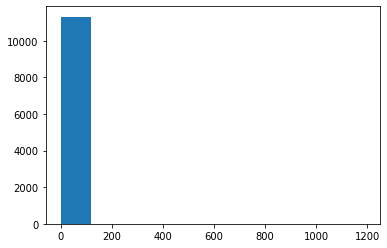

In [56]:
from matplotlib import pyplot as plt

bert_train_lens = [len(i.split()) for i in X_train_bert]
plt.hist(bert_train_lens)

Dengan gambar di atas, disimpulkan bahwa padding length 100

#### Tokenize

In [57]:
bert_pad_len = 100

train_tokens_bert = tokenizer.batch_encode_plus(
    X_train_bert.tolist(),
    max_length=bert_pad_len,
    pad_to_max_length=True,
    truncation=True
)

val_tokens_bert = tokenizer.batch_encode_plus(
    X_val_bert.tolist(),
    max_length=bert_pad_len,
    pad_to_max_length=True,
    truncation=True
)

test_tokens_bert = tokenizer.batch_encode_plus(
    X_test_bert.tolist(),
    max_length=bert_pad_len,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [58]:
from torch import tensor

def bertReplaceLabel(labels):
    return labels.replace(['no', 'yes'], [0, 1]).tolist()

train_seq_bert = tensor(train_tokens_bert['input_ids'])
train_mask_bert = tensor(train_tokens_bert['attention_mask'])
train_y_bert = tensor(bertReplaceLabel(y_train_bert))

val_seq_bert = tensor(val_tokens_bert['input_ids'])
val_mask_bert = tensor(val_tokens_bert['attention_mask'])
val_y_bert = tensor(bertReplaceLabel(y_val_bert))

test_seq_bert = tensor(test_tokens_bert['input_ids'])
test_mask_bert = tensor(test_tokens_bert['attention_mask'])
test_y_bert = tensor(bertReplaceLabel(y_test_bert))

In [59]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

batch_size = 32

train_data_bert = TensorDataset(
    train_seq_bert,
    train_mask_bert,
    train_y_bert
)

train_sampler_bert = RandomSampler(train_data_bert)

train_dataloader_bert = DataLoader(
    train_data_bert,
    sampler=train_sampler_bert,
    batch_size=batch_size
)

val_data_bert = TensorDataset(val_seq_bert,
    val_mask_bert,
    val_y_bert
)

val_sampler_bert = SequentialSampler(val_data_bert)

val_dataloader_bert = DataLoader(
    val_data_bert,
    sampler=val_sampler_bert,
    batch_size=batch_size
)

In [60]:
# freeze arsitektur BERT

for param in bert.parameters():
    param.requires_grade = False

#### Membuat model

In [61]:
import torch.nn as nn

class BERT(nn.Module):
    def __init__(self, bert):
        super(BERT, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)

        return x

In [62]:
from torch import device

device = device("cuda")
model = BERT(bert)
model.to(device)

BERT(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
       

In [63]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [64]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes = np.unique(y_train_bert),
    y = y_train_bert
)

print(f"Class weight: {class_weights} untuk {np.unique(y_train_bert)}")

Class weight: [0.69360373 1.79129747] untuk ['no' 'yes']


In [65]:
import torch

weights = tensor(class_weights, dtype=torch.float)
weights = weights.to(device)
cross_entropy = nn.NLLLoss(weight=weights)

#### Data Train

In [66]:
from torch.nn.utils import clip_grad_norm

def train():
    model.train()
    total_loss = 0
    total_accuracy = 0
    
    for step, batch in enumerate(train_dataloader_bert):
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch    
        model.zero_grad()
        preds = model(sent_id, mask)
        loss = cross_entropy(preds, labels)
        total_loss += loss.item()
        loss.backward()
        clip_grad_norm(model.parameters(), 1.0)
        optimizer.step()
    
    train_loss = total_loss / len(train_dataloader_bert)

    return train_loss

#### Evaluasi

In [67]:
def evaluate():
    model.eval()
    
    total_loss = 0
    total_accuracy = 0
    for step, batch in enumerate(val_dataloader_bert):
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        
        with torch.no_grad():
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss += loss.item()
    
    valid_loss = total_loss / len(val_dataloader_bert)
    
    return valid_loss

In [68]:
from torch import save

best_valid_loss = float('inf')

train_losses = []
valid_losses = []

for epoch in range(3):
    train_loss = train()
    valid_loss = evaluate()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        save(model.state_dict(), 'saved_weights.pt')

    train_losses.append(train_loss)
    valid_losses.append

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  app.launch_new_instance()


In [69]:
from torch import load

model.load_state_dict(load('saved_weights.pt'))

<All keys matched successfully>

In [70]:
with torch.no_grad():
    a = test_seq_bert.to(device)
    b = test_mask_bert.to(device)
    preds = model(a, b)
    preds = preds.detach().cpu().numpy()

In [71]:
from sklearn.metrics import classification_report

pred = np.argmax(preds, axis=1)
print(classification_report(test_y_bert, pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2092
           1       0.61      0.78      0.68       700

    accuracy                           0.82      2792
   macro avg       0.76      0.80      0.78      2792
weighted avg       0.84      0.82      0.82      2792



## Algoritma deep learning dengan non contextual word embedding (fasttext)

In [42]:
from gensim.models import FastText

### Data Processing

In [43]:
import numpy as np

model = FastText(df['tokenized'],min_count=1, size=500)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))
modelft = MeanEmbeddingVectorizer(w2v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [44]:
X_train_vectors_ft = modelft.transform(df["tokenized"])
X_val_vectors_ft = modelft.transform(df_test["tokenized"])

In [ ]:
X_train_vectors_ft.shape

(12938, 500)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=500))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', 
          metrics=[
              tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
              tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall')])

In [46]:
model.fit(X_train_vectors_ft.tolist(), encoded_y_train_w2v, epochs=10, verbose=2)

Epoch 1/10
506/506 - 2s - loss: 0.4425 - accuracy: 0.7960 - precision: 0.6581 - recall: 0.5601 - 2s/epoch - 5ms/step
Epoch 2/10
506/506 - 2s - loss: 0.4244 - accuracy: 0.8087 - precision: 0.6731 - recall: 0.6120 - 2s/epoch - 3ms/step
Epoch 3/10
506/506 - 2s - loss: 0.4193 - accuracy: 0.8120 - precision: 0.6872 - recall: 0.5993 - 2s/epoch - 3ms/step
Epoch 4/10
506/506 - 2s - loss: 0.4165 - accuracy: 0.8144 - precision: 0.6934 - recall: 0.6011 - 2s/epoch - 3ms/step
Epoch 5/10
506/506 - 2s - loss: 0.4137 - accuracy: 0.8137 - precision: 0.6904 - recall: 0.6031 - 2s/epoch - 3ms/step
Epoch 6/10
506/506 - 2s - loss: 0.4106 - accuracy: 0.8143 - precision: 0.6884 - recall: 0.6115 - 2s/epoch - 3ms/step
Epoch 7/10
506/506 - 2s - loss: 0.4110 - accuracy: 0.8163 - precision: 0.6958 - recall: 0.6075 - 2s/epoch - 3ms/step
Epoch 8/10
506/506 - 2s - loss: 0.4095 - accuracy: 0.8177 - precision: 0.7015 - recall: 0.6038 - 2s/epoch - 3ms/step
Epoch 9/10
506/506 - 2s - loss: 0.4065 - accuracy: 0.8183 - prec

In [47]:
ft_prediction = model.predict(X_val_vectors_ft.tolist())

In [48]:
ft_prediction_class = [1 if prob > 0.5 else 0 for prob in ft_prediction]

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(encoded_y_test_w2v, ft_prediction_class))

[[1955  137]
 [ 406  294]]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(encoded_y_test_w2v, ft_prediction_class):.2f}')
print(f'Precision: {precision_score(encoded_y_test_w2v, ft_prediction_class):.2f}')
print(f'Recall: {recall_score(encoded_y_test_w2v, ft_prediction_class):.2f}')

Accuracy: 0.81
Precision: 0.68
Recall: 0.42
